### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

In [2]:
K.set_image_data_format('channels_last')

### Loading mnist dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Shape of data
[i.shape for i in (X_train, y_train, X_test, y_test)]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

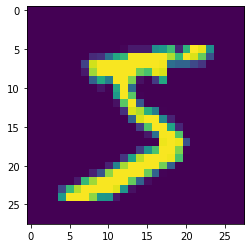

5


In [5]:
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

### Reshaping X_train & X_test as [sample, height, width, channel]

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print('Shape of X_train:',X_train.shape,'\n','Shape of X_test:',X_test.shape)

Shape of X_train: (60000, 28, 28, 1) 
 Shape of X_test: (10000, 28, 28, 1)


### Normalize X_train & X_test

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Exploring the class labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


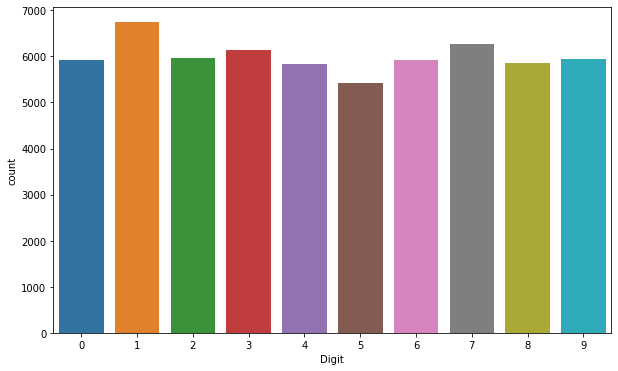

In [12]:
plt.figure(figsize=(10,6))
plt.xlabel('Digit')
plt.ylabel('Count')
sns.countplot(y_train)
plt.show()

### Encoding the training and testing labels

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
total_class = y_train.shape[1]
total_class

10

### Building the Model

In [16]:
shape = X_train[0].shape
shape

(28, 28, 1)

In [17]:
def build_model():
    model = keras.models.Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu', input_shape=shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(total_class, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
my_model = build_model()

In [19]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [20]:
my_model.fit(X_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 88s 147ms/step - loss: 0.1623 - accuracy: 0.9491
Epoch 2/10
600/600 [==============================] - 89s 148ms/step - loss: 0.0474 - accuracy: 0.9854
Epoch 3/10
600/600 [==============================] - 89s 148ms/step - loss: 0.0336 - accuracy: 0.9891
Epoch 4/10
600/600 [==============================] - 88s 147ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 5/10
600/600 [==============================] - 89s 149ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 6/10
600/600 [==============================] - 97s 161ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 7/10
600/600 [==============================] - 99s 164ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 8/10
600/600 [==============================] - 91s 151ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 9/10
600/600 [==============================] - 88s 147ms/step - loss: 0.0108 - accuracy: 0.9966
Epoch 10/10
600/600 [==============================] - 89s 148ms/step - l

In [21]:
loss, accuracy = my_model.evaluate(X_test, y_test)
print('Loss value->', round(loss,3))
print(f"Accuracy of the model-> {round(accuracy*100,2)}%")

313/313 [==============================] - 6s 18ms/step - loss: 0.0233 - accuracy: 0.9939
Loss value-> 0.023
Accuracy of the model-> 99.39%


### Save the Model

In [22]:
my_model.save('digit_recognizer.h5')

### Confusion matrix

In [23]:
y_pred = my_model.predict(X_test)
y_pred[0], y_pred[1]

313/313 [==============================] - 5s 16ms/step


(array([1.0667562e-12, 6.3475343e-11, 9.8594544e-12, 8.8395081e-12,
        6.4108497e-12, 2.4679096e-12, 3.4576480e-16, 1.0000000e+00,
        2.1222264e-12, 6.0484007e-10], dtype=float32),
 array([4.1282377e-11, 7.5886369e-10, 1.0000000e+00, 4.2493979e-15,
        5.8187280e-15, 2.2310588e-20, 7.5703027e-11, 3.2092161e-12,
        1.1788858e-15, 1.0877856e-16], dtype=float32))

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0], y_pred[1]

(7, 2)

In [25]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
y_test = np.argmax(y_test, axis=1)
y_test[0]

7

Text(69.0, 0.5, 'Actual')

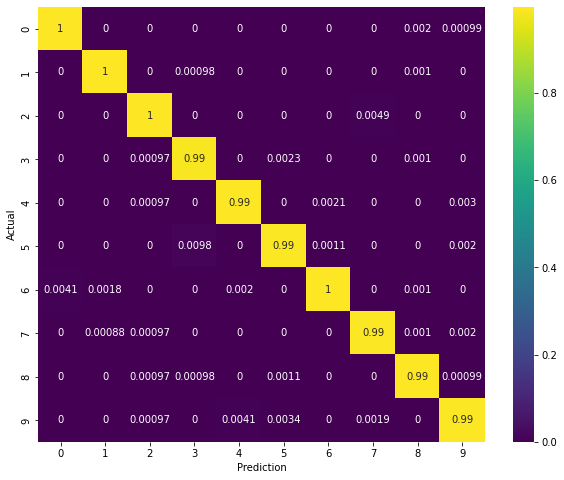

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred, normalize='pred')
fig = plt.figure(figsize=(10,8))
sns.heatmap(mat, annot=True, cmap='viridis')
plt.xlabel('Prediction')
plt.ylabel('Actual')